In [ ]:
import pandas as pd
import datetime as datetime
import os
import  plotly.express as px

# Load  Data CSV File
## You can run file from the first tutorail as liknk  to get ETF fund 
https://github.com/technqvi/MyYoutube-Demo/blob/main/t1_yahoo_to_csv.ipynb

In [ ]:
data_file='data/4CoreETFWorld.csv'
if os.path.exists(data_file):
 print(f"Found {os.path.abspath(data_file)}")
else:
 raise FileNotFoundError(f"Not found file {data_file}")   


# Specify Period  and desire timefame to caculate fund performance and 

In [ ]:
from_str='2022-11-01'
to_str='2023-02-28' 
timeframe='M'

## Explore datafram schema so that we understand dataframe structure in order to do data transformation

In [ ]:

dfAll=pd.read_csv(data_file)
dfAll.info()
dfAll.tail()

## Read csv file and extract and transform data as need

In [ ]:
df = pd.read_csv(data_file,index_col='Date/Time',parse_dates=['Date/Time'],dayfirst=True)
df.index.set_names('date',inplace=True)
df=df.rename(columns={'Ticker':'symbol','close':'price'})
df=df.loc[from_str:to_str,['symbol','price']]
df.tail()

In [ ]:
list_symbol=df['symbol'].unique().tolist() 
print(list_symbol)

In [60]:
symbol='ACWI'
colsROC=['symbol','date','pct_change']
df_Pct_Price=pd.DataFrame(columns=colsROC)
df_Pct_Price

,symbol,date,pct_change


## Resample  data and calculate  Percentage of change ( Return of Investment as percent value on monthly/weekly basis)

In [61]:
for symbol_name in list_symbol:

    dfx_symbol=df.query('symbol==@symbol_name')

    dfx_px=dfx_symbol.resample(timeframe).last()
    dfx_px=dfx_px.reset_index()

    dfx_px['pct_change']=dfx_px['price'].pct_change()*100
    dfx_px['pct_change']=dfx_px['pct_change'].round(2)

    dfx_px=dfx_px.dropna() # the first  rown 
    dfx_px=dfx_px.drop(columns=['price']) # remove price becase we are focuse ROC of Price
    dfx_px=dfx_px[colsROC]
    print(f"Calculate ROC of {symbol}")
    print(dfx_px)
    
    df_Pct_Price=pd.concat([df_Pct_Price,dfx_px],ignore_index=True,axis=0)
    

Calculate ROC of ACWI
  symbol       date  pct_change
1   ACWI 2022-12-23        0.16
2   ACWI 2022-12-30       -0.21
3   ACWI 2023-01-06        2.58
4   ACWI 2023-01-13        3.01
Calculate ROC of ACWI
  symbol       date  pct_change
1    SPY 2022-12-23       -0.09
2    SPY 2022-12-30       -0.13
3    SPY 2023-01-06        1.48
4    SPY 2023-01-13        2.69
Calculate ROC of ACWI
  symbol       date  pct_change
1   AAXJ 2022-12-23       -0.66
2   AAXJ 2022-12-30        0.43
3   AAXJ 2023-01-06        6.14
4   AAXJ 2023-01-13        2.88
Calculate ROC of ACWI
    symbol       date  pct_change
1  TDEX.BK 2022-12-23        0.00
2  TDEX.BK 2022-12-30        2.99
3  TDEX.BK 2023-01-06        0.00
4  TDEX.BK 2023-01-13       -0.20


## Apply ploty to render barchar to show  percentage of fund return

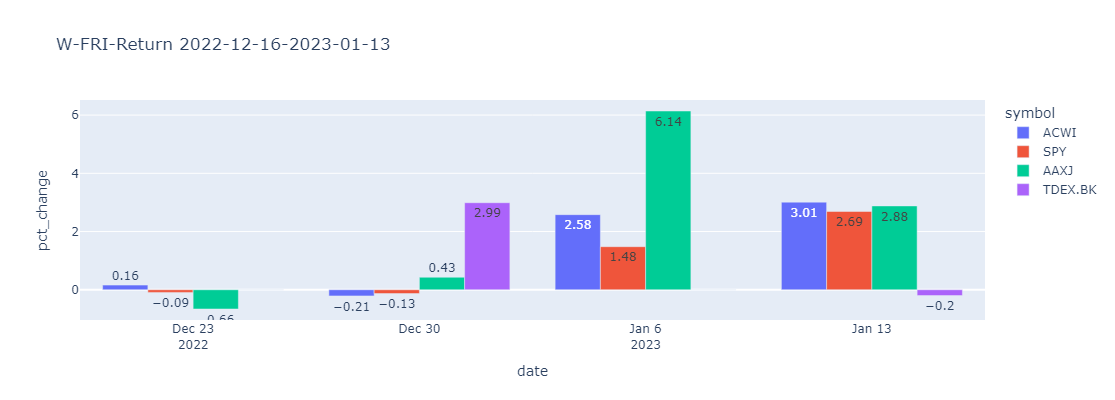

In [62]:
fig = px.bar(df_Pct_Price, x="date", y="pct_change",text_auto=True,
             color='symbol', barmode='group',title=f"{timeframe}-Return {from_str}-{to_str}",
             width=1000,height=400)
fig.show()

In [66]:
dfSum_Pct_Price=df_Pct_Price.groupby(['symbol'])[['pct_change']].sum()
dfSum_Pct_Price.reset_index(drop=False,inplace=True)
dfSum_Pct_Pric=dfSum_Pct_Price.sort_values(by="pct_change",ascending=False)
print(dfSum_Pct_Price)

    symbol  pct_change
0     AAXJ        8.79
1     ACWI        5.54
2      SPY        3.95
3  TDEX.BK        2.79


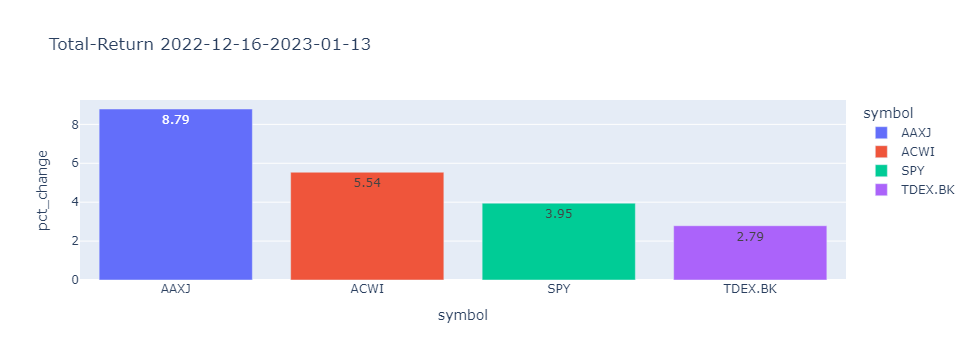

In [67]:
fig = px.bar(dfSum_Pct_Price, x="symbol", y="pct_change",text_auto=True,
                   title=f"Total-Return {from_str}-{to_str}",color='symbol')
fig.show()